In [1]:
import cv2
from scipy.spatial.distance import euclidean
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import euclidean
import numpy as np
from sklearn.cluster import SpectralClustering
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.decomposition import PCA

dir_path = "./dataset/daisy/"
files = os.listdir(dir_path)


FileNotFoundError: [WinError 3] The system cannot find the path specified: './dataset/daisy/'

In [ ]:
def create_similarity_matrix(image_features, distance_measure):
    # create an empty similarity matrix with the same number of rows and columns as the number of images in the dataset
    num_images = len(image_features)
    similarity_matrix = np.zeros((num_images, num_images))

    if distance_measure == "euclidean":
        distance = euclidean
    elif distance_measure == "cosine_similarity":
        distance = lambda x,y : cosine_similarity(x.reshape(1, -1), y.reshape(1, -1))
    elif distance_measure == "manhattan":
        distance = lambda x,y : np.sum(np.abs(np.array(x)-np.array(y)))
    else:
        print("Provide a similarity measure")

    # calculate the euclidean distance between all pairs of images and store the result in the similarity matrix
    for i in range(num_images):
        for j in range(i, num_images): 
            similarity_matrix[i,j] = distance(image_features[i], image_features[j])
            similarity_matrix[j,i] = similarity_matrix[i,j]
    return similarity_matrix


In [ ]:

image_features = features.copy()

similarity_mat = create_similarity_matrix(image_features, "euclidean")

# use Spectral Clustering to partition the data into 5 clusters
clustering = SpectralClustering(n_clusters=5, affinity='precomputed').fit(similarity_mat)

# get the cluster assignments for each image
cluster_assignments = clustering.labels_

c:\Users\kateb\anaconda3\envs\newbase\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [ ]:
names_and_features = zip(files, image_features, cluster_assignments)

In [ ]:
name_and_cluster = zip(files, cluster_assignments)

[('100080576_f52e8ee070_n.jpg', 0), ('10140303196_b88d3d6cec.jpg', 0), ('10172567486_2748826a8b.jpg', 1), ('10172636503_21bededa75_n.jpg', 1), ('102841525_bd6628ae3c.jpg', 0), ('1031799732_e7f4008c03.jpg', 0), ('10391248763_1d16681106_n.jpg', 0), ('10437754174_22ec990b77_m.jpg', 2), ('10437770546_8bb6f7bdd3_m.jpg', 2), ('10437929963_bc13eebe0c.jpg', 0), ('10466290366_cc72e33532.jpg', 2), ('10466558316_a7198b87e2.jpg', 0), ('10555749515_13a12a026e.jpg', 0), ('10555815624_dc211569b0.jpg', 0), ('10555826524_423eb8bf71_n.jpg', 0), ('10559679065_50d2b16f6d.jpg', 0), ('105806915_a9c13e2106_n.jpg', 0), ('10712722853_5632165b04.jpg', 2), ('107592979_aaa9cdfe78_m.jpg', 0), ('10770585085_4742b9dac3_n.jpg', 0), ('10841136265_af473efc60.jpg', 0), ('10993710036_2033222c91.jpg', 0), ('10993818044_4c19b86c82.jpg', 0), ('10994032453_ac7f8d9e2e.jpg', 2), ('11023214096_b5b39fab08.jpg', 2), ('11023272144_fce94401f2_m.jpg', 0), ('11023277956_8980d53169_m.jpg', 2), ('11124324295_503f3a0804.jpg', 0), ('1140

In [ ]:
# Perform PCA on the features
pca = PCA(n_components=34)
principal_components = pca.fit_transform(image_features)



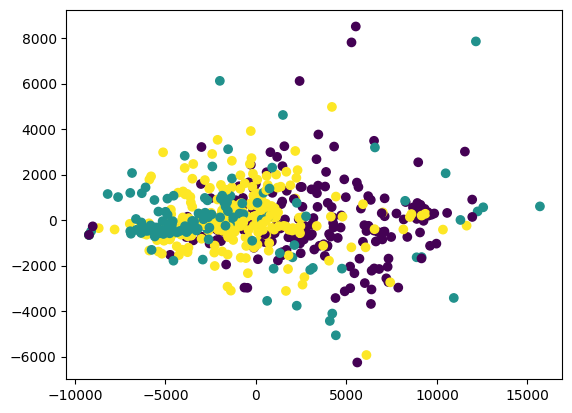

In [ ]:
import matplotlib.pyplot as plt
# Plot the clusters using PCA
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=cluster_assignments)
plt.show()